In [60]:
using Winston;
using Color;
using PyPlot
import DSP

In [112]:
include("sampledata.jl")
include("jnufft.jl");
include("cohenclass.jl");
include("estif.jl");
include("juwutils.jl");
include("stft.jl");
include("smethod.jl");

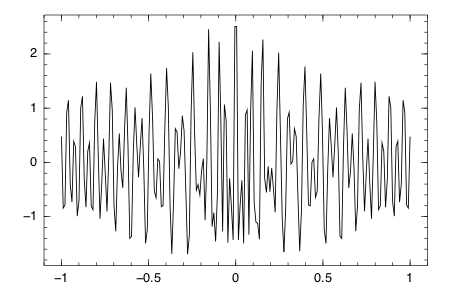

In [168]:
# multicomponent data (Boashash+15,p346,Example 6.2.2)
nsample=200
t,x=sampledata.genmultifm622x(nsample);
Winston.plot(t,x)

Single Wigner Ville


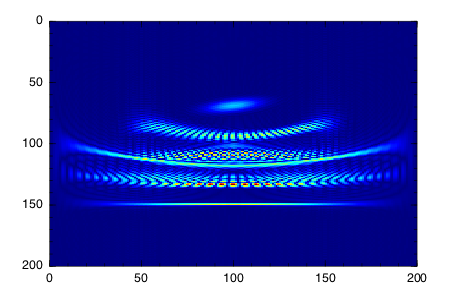

Use fft.


In [169]:
# pseudo Wigner Ville
z=DSP.Util.hilbert(x);
tfr=cohenclass.tfrwv(z);
imagesc(abs(tfr[end:-1:1,:]))

Single Wigner Ville


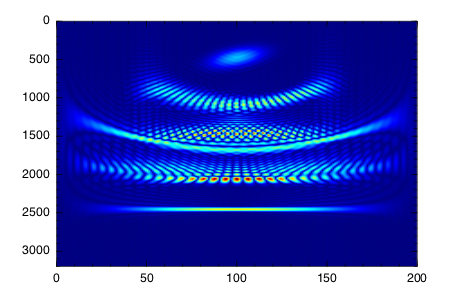

Use nufft.


In [170]:
# Wigner Ville w/ NuFFT
fin=collect(linspace(20,150,nsample*16));
tfrfn=cohenclass.tfrwv(z,NaN,NaN,fin,NaN,0);
imagesc(abs(tfrfn[end:-1:1,:]))

Use fft.


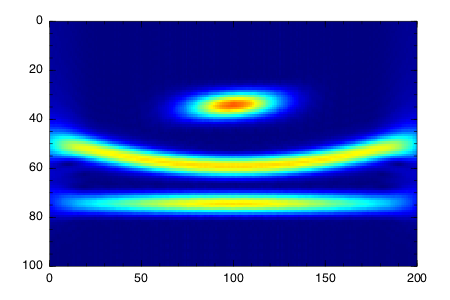

In [171]:
# STFT
tfrstft=stft.tfrstft(x,NaN,NaN,NaN,NaN,4);
imagesc(abs(tfrstft[end/2:-1:1,:]))

Use nufft.


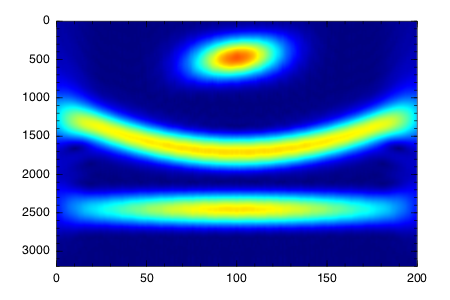

In [172]:
# STFT w/ NUFFT
fin=collect(linspace(10,75,nsample*16));
tfrstft=stft.tfrstft(x,NaN,NaN,fin,NaN,4);
imagesc(abs(tfrstft[end:-1:1,:]))

Use fft.


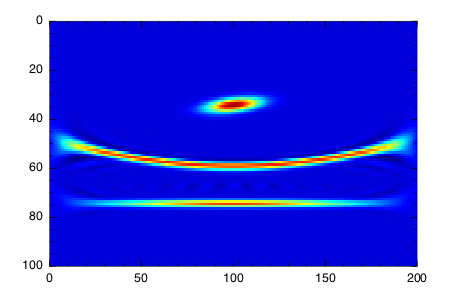

In [186]:
# S-method w/o NuFFT
sm=smethod.tfrsm(x,5,NaN,2)
imagesc(sm[end/2:-1:1,:])

Use nufft.


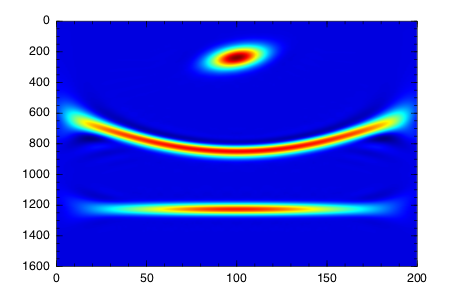

In [181]:
# S-method w/ NuFFT
fin=collect(linspace(10,75,nsample*8));
sm=smethod.tfrsm(x,100,fin,2)
imagesc(sm[end:-1:1,:])